In [1]:
img_height = 224
img_width = 224
batch_size = 32

In [2]:
import tensorflow as tf
# data_dir = r'C:\Users\Academy 2\Desktop\Snapshots3\Snapshots3'
# data_dir = r'E:\Snapshots3'
data_dir = r'C:\Users\SAMA LAPTOP\Desktop\Snapshots3_v3'
data = tf.keras.utils.image_dataset_from_directory(data_dir)


Found 71974 files belonging to 20 classes.


In [3]:
print(tf.__version__)

2.15.0


In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split = 0.2,
subset="training",
seed=123,
    label_mode='categorical',
image_size=(img_height,img_width),
batch_size=batch_size)

Found 71974 files belonging to 20 classes.
Using 57580 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
    label_mode='categorical',
image_size=(img_height,img_width),
batch_size=batch_size)

Found 71974 files belonging to 20 classes.
Using 14394 files for validation.


In [6]:
class_names = train_ds.class_names
class_names

['active zard',
 'attack banafsh',
 'attack sabz',
 'background',
 'chakelz',
 'chay',
 'chay golestan',
 'chitoz halghei',
 'halvarde',
 'khorma',
 'lux',
 'macarooni',
 'nooshabe',
 'pastil',
 'poodr roshd',
 'reshte ash',
 'rob',
 'roghan',
 'somagh sadr',
 'zardchoobe']

In [7]:
from tensorflow import keras
# my_model = keras.models.load_model(r'C:\Users\Academy 2\Downloads\Model_20class_dropoutsTo_v2.h5')
my_model = keras.models.load_model(r'C:\Users\SAMA LAPTOP\Downloads\Model_20class_dropoutsToMore_v3.h5')

In [8]:
my_model

In [9]:
my_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [10]:
import cv2
import time
import numpy as np

In [11]:
def preprocess(frame):
    frame = cv2.resize(frame, (img_width, img_height))
    img_array = tf.keras.utils.img_to_array(frame)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

In [12]:
def predicted_class(numerical_predictions, categorical_predictions):
    num_unique_values = len(set(categorical_predictions))
    if num_unique_values == 1:
        return categorical_predictions[0]
    elif num_unique_values == 2:
        max_prediction = max(numerical_predictions)
        if max_prediction >= 0.90:
            return categorical_predictions[np.argmax(numerical_predictions)]
        else:
            for i in range(len(categorical_predictions)):
                if categorical_predictions.count(categorical_predictions[i]) >= 2:
                    return categorical_predictions[i]
    else:
        return categorical_predictions[np.argmax(numerical_predictions)]

In [14]:


# Open the video capture device (in this case, the default camera)
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open video device or file")
    exit()

# Set the frame rate in frames per second (1 frame per second in this case)
frame_rate = 3
num = 0
numerical_predictions = []
categorical_predictions = []
while True:
    
    # if num >= frame_rate:
    #     print("+++++++++++++++++++++++++")
    #     print(predicted_class(numerical_predictions, categorical_predictions))
    #     print("+++++++++++++++++++++++++")
    #     num = 0
    #     numerical_predictions = []
    #     categorical_predictions = []
    #     time.sleep(10)
        
        
    # Capture a frame
    ret, frame = cap.read()
    # num += 1
    if not ret:
        print("Error: Couldn't capture a frame")
        break



    # print(num)
    
    #preprocessing and predicting ...
    img_array = preprocess(frame)
    predictions = my_model.predict(img_array)[0]
    max_prediction = max(predictions)
    predicted_class = class_names[np.argmax(predictions)]
    # if max_prediction >= 0.85 and class_names[np.argmax(predictions)] != "background":
    #     print("High probablity : " + str(max_prediction))
    #     print("Should be : " + class_names[np.argmax(predictions)])
    # print(predictions)
    # print(class_names)
    # print(class_names[np.argmax(predictions)])
    # print(max_prediction)

    # Display the predicted class on the top left of the frame
    cv2.putText(frame, f"Predicted Class: {predicted_class}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display the captured frame
    cv2.imshow("Captured Image", frame)

    # # Save the image to a file (optional)
    # timestamp = time.time()
    # image_filename = f"captured_image_{int(timestamp)}.jpg"
    # frame = cv2.resize(frame, (224, 224))
    # cv2.imwrite(image_filename, frame)

    # # preprocessing and predicting by sequence of frames ...
    # img_array = preprocess(frame)
    # predictions = my_model.predict(img_array)[0]
    # numerical_predictions.append(max(predictions))
    # categorical_predictions.append(class_names[np.argmax(predictions)])
    # # print(max(predictions))
    # # print(class_names[np.argmax(numerical_predictions)])
    
    
    # Delay to achieve the desired frame rate
    # time.sleep(0.1)
    # Exit the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release the video capture and close the OpenCV window
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 189ms/step


In [17]:
test_data_dir = r'C:\Users\Academy 2\Desktop\TestDir'
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_data_dir,
    image_size=(224, 224),  # Adjust to match the input size of your model
    batch_size=32,          # Adjust based on your memory constraints
    shuffle=False            # Do not shuffle for evaluation
)

Found 615 files belonging to 20 classes.


In [18]:
true_labels = []
predictions = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions.extend(np.argmax(my_model.predict(images), axis=-1))

1/1 [==============================] - 1s 1s/step


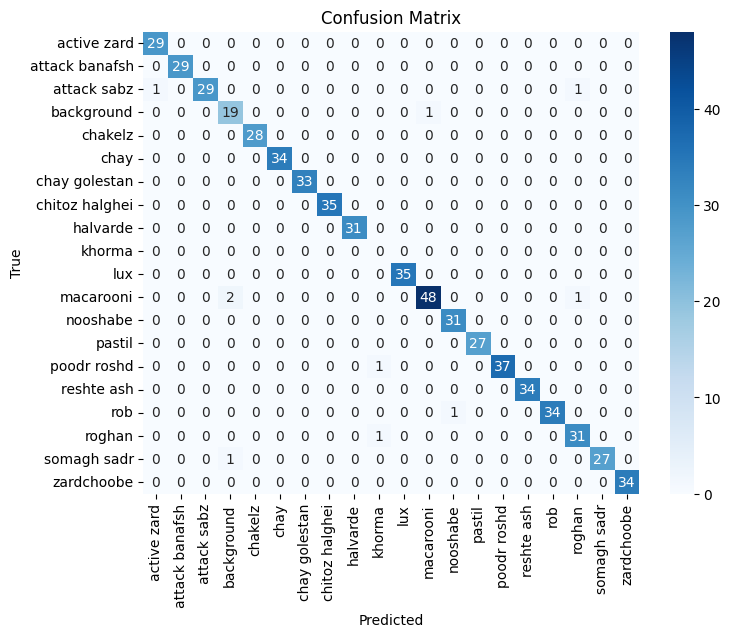

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      1.00      1.00        29
           2       1.00      0.94      0.97        31
           3       0.86      0.95      0.90        20
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        34
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        35
           8       1.00      1.00      1.00        31
           9       0.00      0.00      0.00         0
          10       1.00      1.00      1.00        35
          11       0.98      0.94      0.96        51
          12       0.97      1.00      0.98        31
          13       1.00      1.00      1.00        27
          14       1.00      0.97      0.99        38
          15       1.00      1.00      1.00        34
          16       1.00      0.97      0.99        35
    

C:\Users\Academy 2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Academy 2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Academy 2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Build confusion matrix
conf_matrix = confusion_matrix(true_labels, predictions)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# You can also print a classification report for more detailed metrics
class_report = classification_report(true_labels, predictions)
print("Classification Report:")
print(class_report)

In [65]:
# Assuming you have already loaded and compiled your model
predictions = my_model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)


20/20 [==============================] - 43s 2s/step


In [67]:
# Retrieve the true labels and convert to one-hot encoded format
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
true_classes = np.argmax(true_labels, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [62]:
true_labels = np.concatenate([y for x, y in test_ds], axis=0)
true_labels = np.argmax(true_labels, axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Replace class_names with your actual class names
# class_names = ['class1', 'class2', 'class3', ...]

# Build confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Display classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels))

ValueError: Found input variables with inconsistent numbers of samples: [1789, 615]